<a href="https://colab.research.google.com/github/RISHABHsharm/EIP4/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


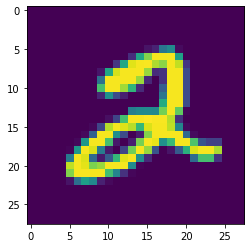

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[5])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [106]:
from keras.layers import Activation
model = Sequential()
 

 
model.add(Convolution2D(16, 3, 3, bias= False, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, bias= False, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, bias= False, activation='relu')) # 11
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3,bias= False, activation='relu')) # 9
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, bias= False,activation='relu')) # 7
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(10, 1, bias= False,activation='relu')) #7
model.add(BatchNormalization())

model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, 1, activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykern

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_369 (Conv2D)          (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_267 (Bat (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_370 (Conv2D)          (None, 24, 24, 16)        2304      
_________________________________________________________________
batch_normalization_268 (Bat (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_120 (Dropout)        (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_371 (Conv2D)          (None, 22, 22, 16)        2320      
_________________________________________________________________
batch_normalization_269 (Bat (None, 22, 22, 16)      

In [107]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 24s 400us/step - loss: 0.1741 - acc: 0.9436 - val_loss: 0.0487 - val_acc: 0.9842
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 7s 112us/step - loss: 0.0557 - acc: 0.9828 - val_loss: 0.0473 - val_acc: 0.9853
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 7s 113us/step - loss: 0.0436 - acc: 0.9869 - val_loss: 0.0323 - val_acc: 0.9894
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 7s 111us/step - loss: 0.0357 - acc: 0.9887 - val_loss: 0.0303 - val_acc: 0.9906
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=====

In [108]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.01932154694770652, 0.9941]
